# 35、使用AdaBoost对房价进行预测

AdaBoost不仅可以用于分类问题，还可以用于回归分析。

那么回忆一下，什么是分类，什么是回归？实际上分类和回归的本质是一样的，都是对未知事物做预测。不同之处在于输出结果的类型，分类输出的是一个离散值，因为物体的分类数有限的，而回归输出的是连续值，也就是在一个区间分为之内任何取值都有可能。

这次的主要目标是使用AdaBoost预测房价，这是一个回归问题。除了对项目进行编码实战外，还要掌握：
- 1、AdaBoost工具的使用，包括使用AdaBoost进行分类，以及回归分析。
- 2、使用其他的回归工具，比如决策树的回归，对AdaBoost回归和决策树回归的结果。


## 如何使用AdaBoost工具

我们可以直接在sklearn中使用AdaBoost。如果我们要用AdaBoost进行分类，需要在使用前引用代码：

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

我们知道，如果看到了Classifier这个类，一般都会对应着Regressor类。AdaBoost也不例外，回归工具包的应用代码如下：

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

我们先看下如何在sklearn中创建AdaBoost分类器。

我们需要使用AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)这个函数，其中有几个比较主要的参数，解析如下：

- 1、**base_estimator** :代表的是弱分类器。在AdaBoost的分类器和回归器中都有这个参数，在AdaBoost中默认使用的是决策树，一般我们不需要修改这个参数，当然也可以指定具体的分类器。
- 2、**n_estimators** ：算法的最大迭代次数，也是分类器的个数，每一次迭代都会引入一个新的弱分类器来增加原有的分类器的组合能力。默认是50.
- 3、**Learning_rate** :代表学习率，取值在0-1之间，默认是1.0。如果学习率较小，就需要比较多的迭代次数才能收敛，也就是说学习率和迭代次数是有相关性的。当你调整Learning_rate的时候，往往也需要调整n_estimators这个参数。
- 4、**algorithm**：代表的是我们要采用哪一种Boosting算法，一共有两种选择：SAMME和SAMME.R。默认是SAMME.R。这两者之间的区别在于对弱分类权重的计算方式不同。
- 5、**random_rate** :代表的是随机数种子的设置，默认是None。随机种子是用来控制随机模式的，当随机种子取了一个值，也就是确定了一种随机规则，其他人取这个值可以得到同样的效果。如果不设置随机种子，每次得到的随机数也就不同。

那么如何创建AdaBoost回归呢？

我们可以使用AdaBoostRegressor(base_estimator=None, n_estimator=50, learning_rate=1.0, loss='linear',random_state=None)这个函数。

我们能够看出回归和分类的参数基本上是一致的，不同点在于回归算法里面没有algorithm这个参数，但是多出了一个loss参数。

loss代表的是损失函数的设置，一共有3种选择器，分别为linear、square和exponential，它们的含义分别为线性、平凡和指数。默认是线性。一般采用线性就可以得到不错的效果。

创建好AdaBoost分类器或者回归器之后，我们就可以输入训练集对它进行训练。使用的是fit函数，传入的训练集中的样本特征值train_X和结果train_y,模型会自动拟合。使用predict函数进行预测，传入的测试集中的样本特征值test_X,然后就可以得到预测的结果。

## 如何使用AdaBoost对房价进行预测

了解了AdaBoost工具之后，我们可以看一下sklearn中自带的波士顿房价数据集。

这个数据集中一共包含506条房屋信息，每一条信息中都包含了13个指标，以及一个房屋价位。

13个指标的涵义可以参考下面的表格：

|指标|含义|
|--|--|
|CRIM|城镇人均犯罪率|
|ZN|住宅用地比例|
|INDUS|非零售商业用地比例|
|CHAS|CHAS变量，0或者1|
|NOX|一氧化氮浓度|
|RM|每个住宅的平均房间数|
|AGE|1940年以前自用房屋的比例|
|DIS|距离五个波士顿就业中心的加权距离|
|RAD|距离高速公路的便捷指数|
|TAX|该地区每一万美元的不动产税率|
|PRTATIO|该地区教师学生比例|
|B|该地区黑人比例|
|LSTAT|该地区中低收入阶层比例|


这些指标分得还是很细的，但是实际上，我们不用关心具体的含义，要做的就是如何通过这13个指标推出最终的房价结果。

有了之前的基础，这个数据集的预测并不复杂。

首先加载数据，将数据分割成训练集和测试集，然后创建AdaBoost回归模型，传入的训练数据进行拟合，再传入测试集数据进行预测，就可以得到预测的结果。最后将预测的结果与实际结果进行对比，得到两者之间的误差。具体代码如下：

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor

# 加载数据
data = load_boston()
# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)
# 使用AdaBoost回归模型
regressor = AdaBoostRegressor()
regressor.fit(train_x, train_y)
# 回归测试集预测
pred_y = regressor.predict(test_x) 
# 计算均方误差
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果", pred_y)
print("均方误差 = ",round(mse,2))

房价预测结果 [19.12346939 10.91219512 13.79491525 17.31782178 23.05502392 20.93571429
 26.01470588 18.15753425 32.50333333 18.37361111 26.84753086 33.85964912
 12.16842105 25.31894737 12.07384615 25.24438776 16.98181818 15.255
 27.64532374 26.01470588 17.58333333 17.31782178 16.86521739 18.77530864
 31.99245283 17.31782178 21.20412371 25.24438776 12.16842105 29.05952381
 16.02179487 26.84753086 10.91219512 21.20412371 26.01470588 31.99245283
 25.24438776 12.16842105 13.79491525 25.31894737 15.16521739 13.12857143
 31.99245283 16.02179487 25.61597633 19.12346939 16.92280702 19.4218543
 25.61597633 19.12346939 16.6509434  32.50333333 15.16521739 16.02179487
 25.24438776 20.56315789 25.24438776 16.02179487 26.01470588 22.48522727
 18.77530864 16.02179487 43.86666667 20.58       16.02179487 25.24438776
 25.61597633 12.16842105 18.37       26.01470588 22.57905759 18.37
 17.58333333 28.27443609 19.4218543  43.54705882 15.24375    12.07384615
 16.92280702 25.24438776 19.93194444 16.02179487 13.1285

这个数据集是比较规范的，我们不需要在数据清洗，数据规范上面花费太多时间精力，代码编写起来也比较简单。

同样，我们可以使用不同的回归分析模型分析这个数据集，比如使用决策树回归和KNN回归。

编写代码如下所示：

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# 加载数据
data = load_boston()
# 分割数据(训练，测试交替：训练-测试；训练-测试)
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

# 使用决策树回归模型
dec_regressor = DecisionTreeRegressor()
dec_regressor.fit(train_x, train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("决策树均方误差 =",round(mse,2))
# 使用KNN回归模型
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(train_x, train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN均方误差 = ", round(mse, 2))


决策树均方误差 = 23.82
KNN均方误差 =  27.87


我们发现相比之下，AdaBoost的均方差（平均方差）更小，也就是结果更优。虽然AdaBoost使用了弱分类器，但是通过50个甚至更多的弱分类器组合起来而形成的强分类器，在很多情况下结果都优于其他算法。因此AdaBoost也是常用的分类和回归算法之一。

## AdaBoost 与决策树模型的比较

在sklearn中的AdaBoost默认采用的是决策树模型，我们可以随机生成一些数据，然后对比下AdaBoost中的弱分类器（也就是决策树弱分类器）、决策树分类器和AdaBoost模型在分类准确率上的表现。

如果想要随机生成数据，饿哦们可以使用sklearn中的make_hastie_10_2函数生成二分类数据。假设我们生成12000个数据，取前2000个作为数据集，其余作为训练集。

有了数据和训练模型之后，我们就可以编写代码。我们设置了AdaBoost的迭代次数为200，代表AdaBoost由200个分类器组成。针对训练集，我们使用三种模型分别进行训练，然后使用测试集进行预测，并将三个分类器的错误率进行可视化对比，可以看到这三者之间的区别：


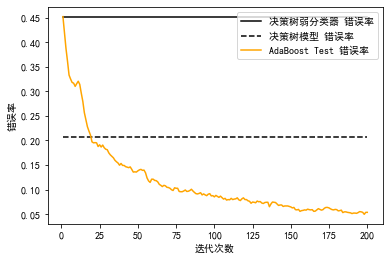

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# 设置AdaBoost迭代的次数
n_estimators = 200
# 使用
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
# 从12000个数据中取前2000行作为测试集，其余的作为训练集
train_x, train_y = X[2000:], y[2000:]
test_x, test_y = X[:2000], y[:2000]
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
# 对弱分类器进行评分
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(train_x, train_y)
# 三个分类器的错误率可视化
fig = plt.figure()
# 设置plt正常显示中文
# plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置图像的参数
ax = fig.add_subplot(111)
# 设置图例实线和虚线
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2, 'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i 为迭代次数，pred_y 为预测结果
for i, pred_y in enumerate(ada.staged_predict(test_x)):
    # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的AdaBoost 错误率，绘制错误率的线是橙色的
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
# 设置x和y轴的图例
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right', fancybox=True)
plt.show()


从图中我们可以看出来，弱分类器的错误率最高，只比随机分类结果略好，准确率稍微大于50%。决策树模型的错误率明显要低很多。而AdaBoost模型在迭代次数超过25次之后，cuowi错误率有了明显的下降，经过125次迭代之后错误率的变化形式趋于平缓。

因此我们能够看出，虽然单独的一个决策树弱分类器效果不好，但是多个决策树弱分类器组合起来形成的AdaBoost分类器，分类效果要好于决策树模型。

## 总结

1、我们使用AdaBoost回归分析对波士顿的房价进行了预测。因为这是个回归分析的问题，我们直接使用sklearn中的AdaBoostRegressor即可，如果是分类。我们使用AdaBoostClassifier。

2、另外我们将AdaBoost分类器、弱分类器和决策分类器做了对比，可以看出经过多个弱分类器组合形成的AdaBoost强分类器，准确率是要明显高于决策树算法。所以AdaBoost的优势在于框架的本身，它通过一种迭代的机制让原本性能不强的分类器组合起来，形成一个强的分类器。

3、其实在工作中，我们也能找到类似的案例。IBM服务器最求的是单个服务器性能的强大，比如说打造超级服务器。而Google在创建集群的时候，利用了很多的PC级的服务器，将它们组成集群，整体的性能远比一个超级服务器的性能强大。也就是“三个臭皮匠，顶个诸葛亮”。这也就是AdaBoost的价值所在吧。

4、AdaBoost实战
- 工具
    - 构造
        - 分类：AdaBoostClassifier
        - 回归：AdaBoostRegressor
    - 参数
        - base_estimator:弱分类器，可以指定，默认是决策树模型
        - n_estimators：算法的最大迭代次数，也就是分类器的个数
        - learning_rate:学习率，取值在0-1之间，默认是1.0
        - algorithm：采用哪种Boosting算法，默认采用的是SAMME.R
        - random_state:代表随机数种子的设置，默认是None
        - loss:代表损失函数的设置，默认是linear
- 数据集
    - 数据集：506条房屋数据，每条数据包含13个指标，以及房屋的价格
    - 使用AdaBoost回归分析，并与决策树回归，KNN回归结果进行比较
- AdaBoost与决策树的对比
    - AdaBoost使用的弱分类器默认是决策树模型
    - 准确率：AdaBoost>决策树>弱分类器
    - 弱分类器错误率很高，但是将多个弱分类器组合形成的AdaBoost性能要明显好于决策树分类器模型。

![](AdaBoost实战.png)




### 练习：使用AdaBoost算法对泰坦尼克号乘客的生存做预测：

将对泰坦尼克号乘客的生存代码做出修改如下：

In [29]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz 

from sklearn.ensemble import AdaBoostClassifier

# 数据加载
train_data = pd.read_csv('./Titanic_data/train.csv')
test_data = pd.read_csv('./Titanic_data/test.csv')
# print(train_data['Embarked'].value_counts())
# 使用平均年龄来填充年龄中的NaN值
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
# 使用票价的均值来填充票价中的NaN值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
# 使用登录最多的港口来填充登录港口的NaN值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)
# 特征选择（特征值矩阵）
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived'] # 加上一个生存标签
test_features = test_data[features]
# 训练集转换类型
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_features, train_labels)

# 构造ID3决策树,去掉criterion='entropy'
clf = DecisionTreeClassifier()
# 拟合，决策树训练
clf.fit(train_features, train_labels)
# 测试集类型转换
test_features = dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)
# 得到决策树的准确率
# acc_decision_tree = round(clf.score(train_features, train_labels), 6)
# print(u'score 准确率为 %.4lf' % acc_decision_tree)
# 使用K折交叉验证 统计决策树的准确率
print(u'ID3的cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels,cv=10)))


# 设置AdaBoost迭代的次数
n_estimators = 200
# AdaBoost分类器(指定弱分类器，其实也可以直接使用ada = AdaBoostClassifier())
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(train_features, train_labels)
# 使用K折交叉验证 统计决策树的准确率
print(u'AdaBoost的cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels,cv=10)))


ID3的cross_val_score准确率为 0.7801
AdaBoost的cross_val_score准确率为 0.7858


由上面的结果可以知道AdaBoost算法一般会比决策树的准确率高一点，也可以将程序分开写如下代码所示:

In [16]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz 

from sklearn.ensemble import AdaBoostClassifier

# 数据加载
train_data = pd.read_csv('./Titanic_data/train.csv')
test_data = pd.read_csv('./Titanic_data/test.csv')
# print(train_data['Embarked'].value_counts())
# 使用平均年龄来填充年龄中的NaN值
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
# 使用票价的均值来填充票价中的NaN值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
# 使用登录最多的港口来填充登录港口的NaN值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)
# 特征选择（特征值矩阵）
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived'] # 加上一个生存标签
test_features = test_data[features]
# 训练集转换类型
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_features, train_labels)
# 设置AdaBoost迭代的次数
n_estimators = 200
# AdaBoost分类器(指定弱分类器，其实也可以直接使用ada = AdaBoostClassifier())
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(train_features, train_labels)
# 测试集类型转换
test_features = dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)
# 使用K折交叉验证 统计决策树的准确率
print(u'AdaBoost的cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels,cv=10)))


AdaBoost的cross_val_score准确率为 0.7779
